In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
train_data = pd.read_csv('datasets/mnist_train.csv')
test_data = pd.read_csv('datasets/mnist_test.csv')

In [4]:
data = np.array(train_data)
m, n = data.shape
np.random.shuffle(data)

In [5]:
# Creating development (validation) and training sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255   # Normalizing pixel values

In [6]:
# Creating Training Dataset from remaining
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255   # Normalizing pixel values
_,m_train = X_train.shape

In [7]:
Y_train

array([5, 2, 7, ..., 1, 2, 3], shape=(59000,))

In [8]:
# Define Required Mathematical Functions
def init_params():
  # Subtract 0.5 from each para. to keep the range b/w -0.5 to +0.5
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_propogation(W1, b1, W2, b2, X):     # X is A0
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot_encode(Y):
  one_hot = np.zeros((Y.size, Y.max() + 1))
  one_hot[np.arange(Y.size), Y] = 1
  one_hot = one_hot.T
  return one_hot

def derivative_ReLU(Z):
  return Z > 0

def back_propogation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot_encode(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [9]:
# Define Gradient Descent & it's required functions
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propogation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propogation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
# Train the model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[1 7 1 ... 7 5 2] [5 2 7 ... 1 2 3]
0.062271186440677966
Iteration:  10
[6 6 1 ... 7 1 2] [5 2 7 ... 1 2 3]
0.154
Iteration:  20
[6 1 1 ... 1 1 2] [5 2 7 ... 1 2 3]
0.19794915254237289
Iteration:  30
[6 1 1 ... 4 1 2] [5 2 7 ... 1 2 3]
0.26805084745762714
Iteration:  40
[6 1 1 ... 4 6 3] [5 2 7 ... 1 2 3]
0.339864406779661
Iteration:  50
[6 3 4 ... 7 6 3] [5 2 7 ... 1 2 3]
0.3835593220338983
Iteration:  60
[6 3 4 ... 7 6 3] [5 2 7 ... 1 2 3]
0.4256949152542373
Iteration:  70
[6 3 4 ... 7 6 3] [5 2 7 ... 1 2 3]
0.47452542372881357
Iteration:  80
[6 3 7 ... 1 6 3] [5 2 7 ... 1 2 3]
0.5256440677966102
Iteration:  90
[6 3 7 ... 1 2 3] [5 2 7 ... 1 2 3]
0.5673050847457627
Iteration:  100
[6 3 7 ... 1 2 3] [5 2 7 ... 1 2 3]
0.5970847457627119
Iteration:  110
[6 3 7 ... 1 2 3] [5 2 7 ... 1 2 3]
0.6202542372881356
Iteration:  120
[6 3 7 ... 1 2 3] [5 2 7 ... 1 2 3]
0.6406101694915254
Iteration:  130
[6 3 7 ... 1 2 3] [5 2 7 ... 1 2 3]
0.6563559322033898
Iteration:  140
[6 3 7 ...

In [13]:
def make_prediction(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_prediction(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Label:", label)
    print("Prediction:", prediction)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Label: 5
Prediction: [5]


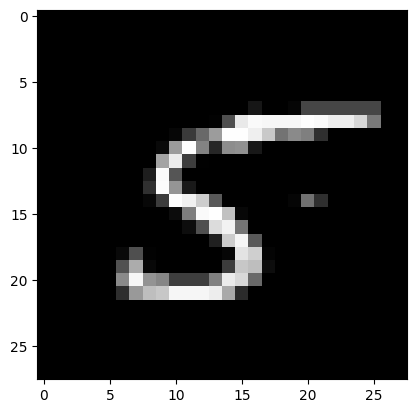

Label: 2
Prediction: [2]


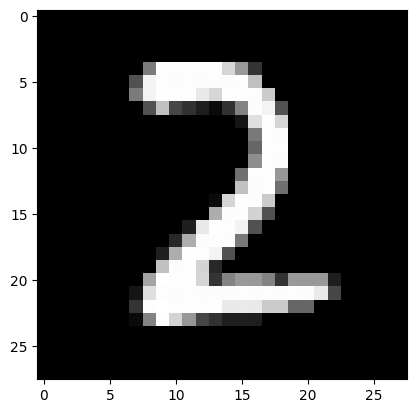

Label: 7
Prediction: [7]


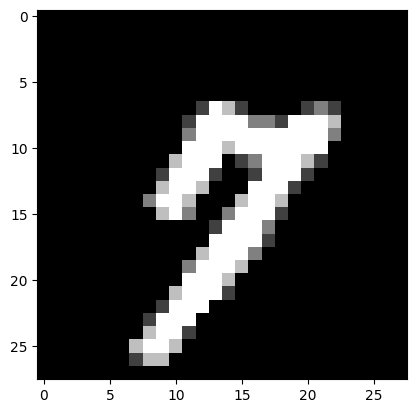

Label: 4
Prediction: [4]


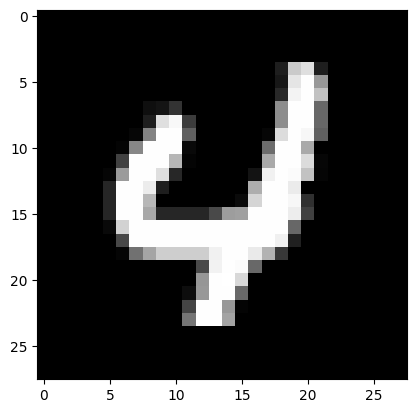

In [16]:
test_predictions(0, W1, b1, W2, b2)
test_predictions(1, W1, b1, W2, b2)
test_predictions(2, W1, b1, W2, b2)
test_predictions(3, W1, b1, W2, b2)

In [18]:
# Finding accuracy on dev set
dev_predictions = make_prediction(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 2 2 3 1 0 7 6 5 3 4 7 0 1 6 0 1 1 7 3 7 5 9 4 7 8 7 2 6 3 2 4 0 6 5 1 0
 0 4 9 2 4 9 9 5 1 2 1 4 7 3 4 0 5 0 2 9 0 8 4 4 1 6 1 1 4 5 6 3 0 5 9 1 5
 5 2 8 4 8 6 7 2 1 8 2 4 1 2 9 0 7 9 6 7 2 5 2 3 9 5 6 0 2 1 5 7 0 1 8 4 8
 3 7 1 6 8 1 6 2 2 5 5 3 1 9 9 4 3 6 3 0 1 8 3 3 8 3 5 3 0 8 3 9 9 8 3 9 7
 4 8 6 9 4 4 9 7 6 8 1 4 8 9 9 6 1 9 4 0 1 6 6 2 2 1 0 5 1 1 0 0 6 6 7 1 3
 3 0 1 1 9 9 2 7 4 4 5 2 6 1 3 6 9 4 1 8 8 7 8 1 2 6 6 9 1 4 6 1 3 3 3 1 2
 3 5 0 8 8 3 8 2 3 0 8 1 8 0 0 7 1 6 1 5 2 3 0 8 0 8 2 2 1 8 1 6 5 8 8 3 1
 2 0 0 3 7 7 6 6 6 4 7 1 1 4 6 4 0 0 5 4 3 0 9 0 1 2 2 4 1 1 8 5 8 0 3 9 3
 5 6 8 4 1 9 4 1 9 3 8 3 2 7 3 3 7 1 0 9 4 1 0 5 5 2 7 1 9 7 4 7 7 2 6 9 9
 1 8 2 8 3 3 5 0 0 3 9 9 9 0 7 8 3 4 8 4 4 7 4 5 9 1 7 1 1 9 4 2 5 1 2 0 8
 6 1 8 6 2 2 3 0 9 8 6 7 0 1 8 2 8 9 1 1 3 5 7 0 1 9 1 4 0 4 8 8 8 8 1 9 6
 9 7 0 2 5 9 9 4 0 4 4 3 0 8 1 4 9 6 0 4 9 4 3 0 5 6 0 0 8 7 5 4 3 1 1 0 9
 8 6 0 4 1 5 0 6 3 3 4 1 4 5 6 9 3 1 0 4 1 5 9 1 3 5 1 0 8 2 2 8 2 3 6 2 5
 5 1 6 9 9 6 4 4 0 5 1 6 

np.float64(0.846)

### Accuracy on dev set is 84.6%